In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('invasion.csv')

In [3]:
df['class'].unique()

array(['transport', 'fighter', 'cruiser'], dtype=object)

In [4]:
transport = {'transport' :  0,  'fighter' :  1,  'cruiser' : 2}
y_train = df['class'].map(transport)

In [5]:
x_train = df.drop('class', axis=1)

In [6]:
x_train.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [7]:
y_train.head()

0    0
1    0
2    0
3    1
4    1
Name: class, dtype: int64

In [8]:
rf = RandomForestClassifier(random_state=0)

In [9]:
params = {
    'n_estimators' : range(10, 100, 10),
    'max_depth' : range(1, 13),
    'min_samples_leaf' : range(1, 10),
    'min_samples_split' : range(2, 10, 2)
}

In [10]:
grid_rf = GridSearchCV(rf, params, cv=5, n_jobs=-1)

In [11]:
grid_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 100, 10)})

In [12]:
best_rf = grid_rf.best_estimator_

In [13]:
grid_rf.best_params_

{'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 30}

In [14]:
x_test = pd.read_csv('operative_information.csv')

In [15]:
x_test.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [16]:
y_pred = pd.DataFrame(best_rf.predict(x_test), columns=['predictions'])

In [17]:
transport_back = {0 : 'transport',  1 : 'fighter',  2 : 'cruiser'}

In [18]:
y_pred.predictions = y_pred.predictions.map(transport_back)

In [19]:
y_pred.value_counts()

predictions
fighter        675
transport      595
cruiser        230
dtype: int64

In [20]:
fimp = pd.DataFrame(best_rf.feature_importances_,
                    index=x_train.columns, columns=['importance']) \
                    .sort_values('importance', ascending=False)

<AxesSubplot:xlabel='importance'>

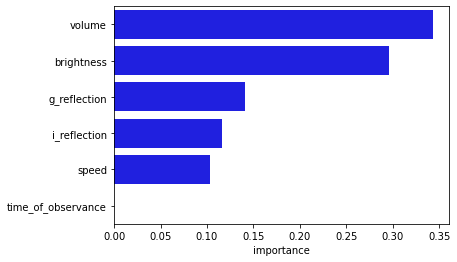

In [21]:
sns.barplot(x="importance", y=fimp.index, data=fimp,
            label="Feature importances", color="b")